# Testing your model

So far we have been fitting our model to the data and assuming that it is doing a good job. We have not had any method for analysing the quality of the fit. In our example so far we first looked at the fit with our eyes and judged it sufficient. We then compared the output parameters with our ground-truth and judged it to be "close enough".

To truly judge how good the model is, we need to compare it with some data and see how well it aligns (i.e. how well it would be able to predict it).

Naïvely we might think to compare our model against the same data we used to fit it. However, this is a dangerous thing to do as it encourages you to tweak your model to best fit the data that you have in hand rather than trying to make a model which can predict things about the *process which generated* your data. Making your model fit your local subset well, at the expense of the global superset is known as *overfitting*.

For example, imagine we have a true physical model:

<img src="overfit_just_model.svg" style="box-shadow: none;" width=400>

If we want to understand the underlying model, we can make measurements of it:

<img src="overfit_model.svg" style="box-shadow: none;" width=400>

However, we cannot see the underlying model directly so all that we see is:

<img src="overfit_samples.svg" style="box-shadow: none;" width=400>

We can fit this model with perhaps varying degrees of polynomial. Mathematically, if we increase the degree of polynomial far enough we can fit any function. For example, fitting the data with a 15<sup>th</sup>-order polynomial creates a model which goes through most of the data points but clearly represent the underlying model badly:

<img src="overfit_15.svg" style="box-shadow: none;" width=400>

Here we can *see* that the model is not doing a good job of representing the underlying function (because we saw it above) but in the real world you do not usually have the underlying model available. In those cases overfitting is harder to see as it just manifests as a "well-performing" model. Seen in isolation, this model looks like it is performing quite well, whereas a 3<sup>rd</sup>-order polynomial looks slightly worse (as fewer of the bumps are accounted for):

<img src="overfit_3.svg" style="box-shadow: none;" width=400>

The simplest solution to overfitting is to fit your model with one subset of data and then assess its quality with another subset. If those two subsets are independent then any specific features in the former which your model might try to overfit to will not be present in the latter and so it will be judged poorly.

<img src="overfit_split.svg" style="box-shadow: none;" width=400>

Bringing up our data from the last chapter again:

In [1]:
import pandas as pd

data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")

X = data[["x"]]
y = data["y"]

scikit-learn provides a built-in function, [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), to split your data into a subset of data to fit with and a subset of data to test against:

In [2]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

`train_test_split` will split your data randomly and so to get a reproducible "random" split we set the `random_state` argument.

To see that `train` and `test` are taken from the same distribution let's plot them:

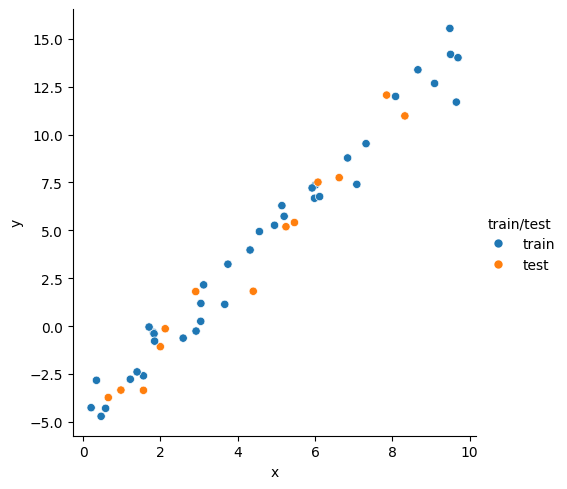

In [3]:
import seaborn as sns

# Label the original DataFrame with the test/train split
# This is just used for plotting purposes
data.loc[train_X.index, "train/test"] = "train"
data.loc[test_X.index, "train/test"] = "test"

sns.relplot(data=data, x="x", y="y", hue="train/test")

Now that we have `train` and `test` we should only ever pass `train` to the `fit` function:

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

To find out how good the fit was, we can call the [`score`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) method on the model. It is important here that we pass in our *test* data set as we expect that to provide an independent validation of the model.

In [5]:
model.score(test_X, test_y)

0.9676069631786152

A score of $1.0$ is a perfect match and anything less than that is less-well performing. A score of $0.97$ suggests we have a very good model.

Going back to our example from the start, we can see that when we compare our 3<sup>rd</sup>- and 15<sup>th</sup>-order polynomials against the *test data*, the 3<sup>rd</sup>-order score will be much better:

<img src="overfit_3_15_split.svg" style="box-shadow: none;" width=400>

### Exercise

- Load the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) from the scikit-learn collection. You can load the dataset into pandas with:
  ```python
  from sklearn.datasets import load_diabetes
  
  X, y = load_diabetes(as_frame=True, return_X_y=True)
  ```
- Split the data into `train` and `test` subsets
- Fit and plot the linear relationship between the "bmi" column (Body mass index) and the "target" column (quantitative measure of disease progression one year after baseline). 
- Calculate the score of the model against the `test` data set. 
- [<small>answer</small>](answer_diabetes_regression.ipynb)

Next we will learn a little more about machine learning and how we can apply it to our own work.